$Step-1$:
    
**Import required packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

$Step-2$

**Read the data**

In [2]:
# read the dataset 
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**Objective**

- Based on years of experience , estimate the salary of an employee

In [3]:
df.shape

(30, 2)

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [7]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [8]:
#check any correlation and covariance

df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


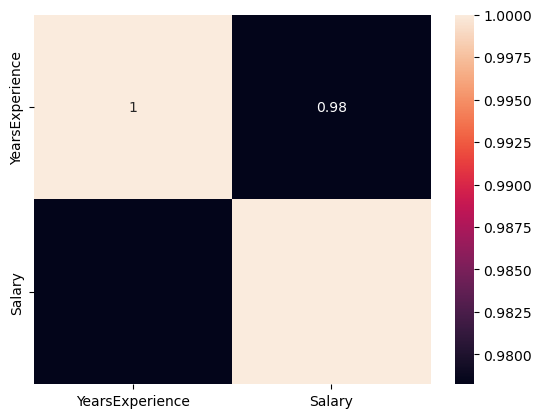

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

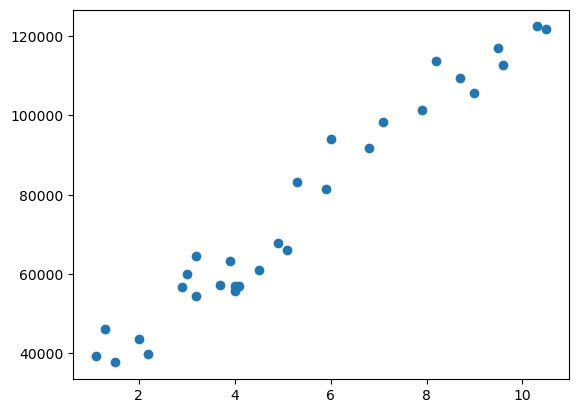

In [12]:
plt.scatter(df['YearsExperience'],df['Salary'])

- We divide data into two parts i.e input data and output data

- input data = X; output data=y

- Again we divide input data into two parts i.e train and test

- input train data= x_train; input test data= x_test

- similarly we divide output data into two parts i.e train and test

- output train data= y_train; output test data= y_test

- Model development happens on train data i.e x_train and y_train

- Model will predict by passing x_test data, these are called y_predictions

- y_predictions will compare with y_test , this is called test accuracy/ test error

In [13]:
#x_train   y_train
#1           1
#2           4
#3           9
#4           16

#x_test    y_test
#5         25

#develope a model (1,1) (2,4) (3,9) (4,16)
#model will predict by passing 5 , y_predictions  we need to compare with y_test 

$Step-3$

**divide data into input and output data**

In [14]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [15]:
X=df['YearsExperience']
y=df['Salary']

$Step-4$

**Divide data into train and test**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=42, # it select random samples
                                                  test_size=0.30)

# test size= 0.30 means 30% samples are test sample and 70% samples are train samples
# test samples=9
# train samples =21

In [17]:
X_train.shape, X_test.shape

((21,), (9,))

In [18]:
y_train.shape, y_test.shape

((21,), (9,))

In [19]:
X_train

0      1.1
4      2.2
16     5.1
5      2.9
13     4.1
11     4.0
22     7.9
1      1.3
2      1.5
25     9.0
3      2.0
21     7.1
26     9.5
18     5.9
29    10.5
20     6.8
7      3.2
10     3.9
14     4.5
19     6.0
6      3.0
Name: YearsExperience, dtype: float64

In [20]:
df.shape
30*0.30

9.0

$Step-5$

**Model development**

In [21]:
# Model development happens using train data
# X_train    y_train
#from sklearn.linear_model import LinearRegression
#LR=LinearRegression()


In [22]:
X_train.shape

(21,2)

(21, 2)

In [23]:
df.shape   # 30 rows   2 columns

(30, 2)

In [24]:
df.ndim # number of dimensions

2

In [25]:
X_train.ndim
# 1 dimension means 1 column only
# 2 dimension means 2 column only
# when you have only 1 coulmn, the shape will not show the coulumn
# (21,) it is only one column data having 21 observations
# (9,) it is one column data having 9 observation
# (30,2) it is 2 column data having 30 observation
# Reshape the data if you have only one column

1

In [26]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train.array.reshape(-1, 1),
       y_train)

LinearRegression()

$Step-6$

**Model predictions**

In [27]:
# Model predictions happens X_test
y_predictions=LR.predict(X_test.array.reshape(-1, 1))

In [28]:
y_predictions

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [29]:
y_test.values

array([112635,  67938, 113812,  83088,  64445,  57189, 122391, 109431,
        56957], dtype=int64)

$Step-7$

**Model evaluation**

In [30]:
# RMSE
# MSE
# MAE
# R-square

from sklearn.metrics import r2_score,mean_squared_error

In [31]:
R2=r2_score(y_test,y_predictions)
MSE=mean_squared_error(y_test,y_predictions)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-sqaure: 0.9414466227178214
MSE: 37784662.46621314
RMSE: 6146.92300799458


In [32]:
# Suppose your original salary is 50k
# Our model will expecting either 44k  or  56k 

$Step-8$

**Finding coeffiecnt and Intercept**

- Coefficient means b0 ,b1 ,b2....

- Coeffiecints depends on number of input features

- In this data we have only one column as input i.e. Years of Experience

- So we will get only one coeffiecnt

In [33]:
LR.coef_
print("The coeffiecnt of Years_of_experience is:",LR.coef_)

The coeffiecnt of Years_of_experience is: [9339.08172382]


In [34]:
LR.intercept_

25918.438334893202

In [35]:
df.columns[0]

'YearsExperience'

In [36]:
#Regression_equation=LR.intercept_+LR.coef_*'YearsExperience'
#Regression_equation

$Step-9$

**Plot the regression line**

- In order to plot regression line

- We need to undertsand the two plots

- Orginal data plot i.e input data(X) vs output data(y)

- Regression plot i.e input data (X) vs predictions of regression model by passing input data (X)

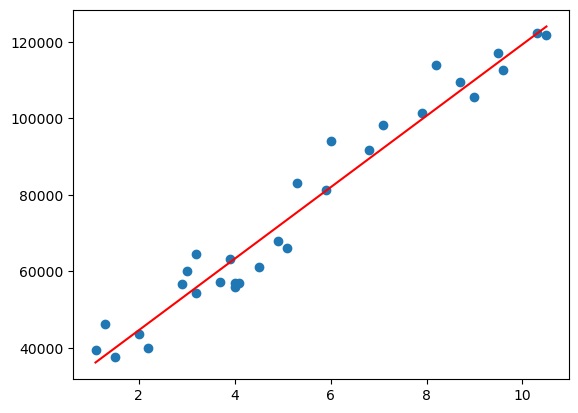

In [37]:
# Draw the regression line on original data vs predictions on original data

original_y_predictions=LR.predict(X.array.reshape(-1,1))
plt.scatter(X,y,label='original data')  # Original plot
plt.plot(X,original_y_predictions,color='red') # Regression plot

$Step-10$:
    
**Save the model**

In [38]:
import pickle
pickle.dump(LR,
            open('linear_salary_model.pkl','wb'))

#Model name=LR
#In which name the model is saving: linear_slaary_model
# extenstion: Pickle
# wb: write in bytes

$Step-11$:

**Load the model**

In [39]:
# Loading model to compare the results
model = pickle.load(open('linear_salary_model.pkl','rb'))
model

LinearRegression()

$Step-13$:
    
**Predictions**

In [40]:
X.array.reshape(-1,1)

<NumpyExtensionArray>
[
[1.1],
[1.3],
[1.5],
[2.0],
[2.2],
[2.9],
[3.0],
[3.2],
[3.2],
[3.7],
[3.9],
[4.0],
[4.0],
[4.1],
[4.5],
[4.9],
[5.1],
[5.3],
[5.9],
[6.0],
[6.8],
[7.1],
[7.9],
[8.2],
[8.7],
[9.0],
[9.5],
[9.6],
[10.3],
[10.5]
]
Shape: (30, 1), dtype: float64

In [41]:
model.predict([[3],
               [3.5],
               [4]])

array([53935.68350634, 58605.22436825, 63274.76523015])

In [42]:
test_sample=[[1.1],[1.5],[2.5],[3.5]]
model.predict(test_sample)

array([36191.42823109, 39927.06092062, 49266.14264443, 58605.22436825])

In [43]:
import joblib

In [44]:
joblib.dump(model,'salary.pkl')

['salary.pkl']

In [45]:
from flask import Flask
from flask import render_template
import joblib
from flask import request

In [ ]:
app=Flask(__name__)
model=joblib.load('salary.pkl')
@app.route('/index')
def hello(name=None):
    return render_template('index.html',name=name)

@app.route('/result',methods=['GET','POST'])
def get_value():
    if request.method=="POST":
        YearsExperience=float(request.form.get('YearsExperience'))
        Salary=float(request.form.get('Salary'))
        predict=model.predict([[year_experience,salary]])
        print(predict[0])
    
    return render_template('result.html',prediction=[predict[0]])
    


In [ ]:
if __name__=="__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
